<a href="https://colab.research.google.com/github/rex2711/Machine-Learning/blob/master/AV_Competitions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
%cd /content/drive/My Drive

/content/drive/My Drive


In [0]:
df_train=pd.read_csv('train.csv')

In [0]:
df_test=pd.read_csv('test-2.csv')

In [0]:
df_test['m13']=np.nan
df_test['data']='test'
df_train['data']='train'

In [0]:
df_test=df_test[df_train.columns]
df=pd.concat([df_test,df_train],axis=0)

In [0]:
df.drop(['loan_id'],axis=1,inplace=True)

In [12]:
list(zip(df.dtypes,df.columns,df.nunique()))

[(dtype('O'), 'source', 3),
 (dtype('O'), 'financial_institution', 19),
 (dtype('float64'), 'interest_rate', 1121),
 (dtype('int64'), 'unpaid_principal_bal', 660),
 (dtype('int64'), 'loan_term', 149),
 (dtype('O'), 'origination_date', 6),
 (dtype('O'), 'first_payment_date', 8),
 (dtype('int64'), 'loan_to_value', 93),
 (dtype('float64'), 'number_of_borrowers', 2),
 (dtype('float64'), 'debt_to_income_ratio', 58),
 (dtype('float64'), 'borrower_credit_score', 223),
 (dtype('O'), 'loan_purpose', 3),
 (dtype('float64'), 'insurance_percent', 14),
 (dtype('float64'), 'co-borrower_credit_score', 216),
 (dtype('float64'), 'insurance_type', 2),
 (dtype('int64'), 'm1', 4),
 (dtype('int64'), 'm2', 5),
 (dtype('int64'), 'm3', 6),
 (dtype('int64'), 'm4', 7),
 (dtype('int64'), 'm5', 8),
 (dtype('int64'), 'm6', 9),
 (dtype('int64'), 'm7', 10),
 (dtype('int64'), 'm8', 10),
 (dtype('int64'), 'm9', 11),
 (dtype('int64'), 'm10', 12),
 (dtype('int64'), 'm11', 13),
 (dtype('int64'), 'm12', 13),
 (dtype('floa

In [0]:
df['origination_date']=np.where(df['origination_date']=='2012-02-01' ,'Feb',df['origination_date'])
df['origination_date']=np.where(df['origination_date']=='2012-01-01' ,'Jan',df['origination_date'])
df['origination_date']=np.where(df['origination_date']=='01/02/12' ,'Feb',df['origination_date'])
df['origination_date']=np.where(df['origination_date']=='01/01/12' ,'Jan',df['origination_date'])
df['origination_date']=np.where(df['origination_date']=='2012-03-01' ,'March',df['origination_date'])
df['origination_date']=np.where(df['origination_date']=='01/03/12' ,'March',df['origination_date'])

In [0]:
df['first_payment_date']=np.where(df['first_payment_date']=='04/2012' ,'Apr',df['first_payment_date'])
df['first_payment_date']=np.where(df['first_payment_date']=='03/2012' ,'March',df['first_payment_date'])
df['first_payment_date']=np.where(df['first_payment_date']=='Apr-12' ,'Apr',df['first_payment_date'])
df['first_payment_date']=np.where(df['first_payment_date']=='05/2012' ,'May',df['first_payment_date'])
df['first_payment_date']=np.where(df['first_payment_date']=='Mar-12' ,'March',df['first_payment_date'])
df['first_payment_date']=np.where(df['first_payment_date']=='May-12' ,'May',df['first_payment_date'])
df['first_payment_date']=np.where(df['first_payment_date']=='02/2012' ,'Feb',df['first_payment_date'])
df['first_payment_date']=np.where(df['first_payment_date']=='Feb-12' ,'Feb',df['first_payment_date'])

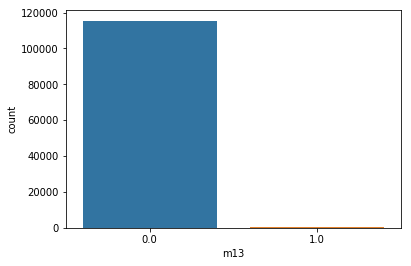

In [0]:
#it shows very small number of failure in payment
sns.countplot(data=df,x='m13')

In [12]:
#List all the catagorical variables from the data to create the dummmies
cat_var=df.select_dtypes(['object']).columns

cat_var

Index(['source', 'financial_institution', 'origination_date',
       'first_payment_date', 'loan_purpose', 'data'],
      dtype='object')

In [17]:
freq.index[freq>500][:1]

Index(['X'], dtype='object')

In [14]:
for col in cat_var[:-1]:
    freq=df[col].value_counts()
    k=freq.index[freq>500][:1]
    for cat in k:
        name=col+ '_'+cat
        df[name]=(df[col==cat]).astype(int)
    del df[col]
    print(col)

KeyError: ignored

In [16]:
for col in cat_var[:-1]:
    
    dummy=pd.get_dummies(df[col],drop_first=True,prefix=col)
    df=pd.concat([df,dummy],axis=1)
    del df[col]
    print(col)
del dummy

source
financial_institution
origination_date
first_payment_date
loan_purpose


In [17]:
df.isnull().sum()

interest_rate                                            0
unpaid_principal_bal                                     0
loan_term                                                0
loan_to_value                                            0
number_of_borrowers                                      0
debt_to_income_ratio                                     0
borrower_credit_score                                    0
insurance_percent                                        0
co-borrower_credit_score                                 0
insurance_type                                           0
m1                                                       0
m2                                                       0
m3                                                       0
m4                                                       0
m5                                                       0
m6                                                       0
m7                                                      

In [0]:
df_train=df[df['data']=='train']
del df_train['data']
df_test=df[df['data']=='test']
del df_test['data']

In [0]:
from sklearn.linear_model import LogisticRegression,Lasso,Ridge
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [0]:
#Split the data into x_train,y_train
x_train=df_train.drop(['m13'],axis=1)
y_train=df_train['m13']
x_test=df_test.drop(['m13'],axis=1)
y_test=df_test['m13']

In [0]:
params={'class_weight':['balanced',None],
       'penalty':['l1','l2'],
       'C':np.linspace(0.1,100,100)}

In [0]:
model=LogisticRegression(fit_intercept=True)

In [0]:
Gridsearch=GridSearchCV(model,param_grid=params,cv=10,scoring='roc_auc')

In [0]:
Random_search=RandomizedSearchCV(model,param_distributions=params,cv=10,scoring='roc_auc',verbose=1,n_jobs=-1,n_iter=10)

In [0]:
#So that we can ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [0]:
Random_search.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  8.3min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributio...
        80.82727273,  81.83636364,  82.84545455,  83.85454545,
        84.86363636,  85.87272727,  86.88181818,  87.89090909,
        88.9       ,  89.90909091,  90.91818182,  91.92727273,
        92.93636364,  93.94545455,  94.95454

In [0]:
Random_search.best_params_

{'C': 72.75454545454545, 'class_weight': 'balanced', 'penalty': 'l2'}

In [0]:
Random_search.best_estimator_

LogisticRegression(C=72.75454545454545, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#This you will get in skikit learn documentation
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [0]:
report(Random_search.cv_results_,3)

Model with rank: 1
Mean validation score: 0.893 (std: 0.023)
Parameters: {'penalty': 'l2', 'class_weight': 'balanced', 'C': 72.75454545454545}

Model with rank: 2
Mean validation score: 0.892 (std: 0.024)
Parameters: {'penalty': 'l2', 'class_weight': 'balanced', 'C': 100.0}

Model with rank: 3
Mean validation score: 0.890 (std: 0.023)
Parameters: {'penalty': 'l1', 'class_weight': 'balanced', 'C': 32.39090909090909}



In [0]:
logr=Random_search.best_estimator_

In [0]:
logr.fit(x_train,y_train)

In [43]:
list(zip(logr.coef_[0],x_train.columns))

[(0.8008652467781405, 'interest_rate'),
 (-4.800876236374454e-07, 'unpaid_principal_bal'),
 (-0.0014086017834633402, 'loan_term'),
 (-0.003899760326286626, 'loan_to_value'),
 (2.926538919929598, 'number_of_borrowers'),
 (0.019177659113219944, 'debt_to_income_ratio'),
 (-0.011707016919913247, 'borrower_credit_score'),
 (0.0012615117106574616, 'insurance_percent'),
 (-0.004598524933923201, 'co-borrower_credit_score'),
 (0.7682390603370879, 'insurance_type'),
 (1.1105545805358998, 'm1'),
 (1.1849670232294904, 'm2'),
 (0.3237232368577522, 'm3'),
 (1.7229523468681334, 'm4'),
 (1.7441276150658518, 'm5'),
 (1.4288993236068308, 'm6'),
 (1.06048726185297, 'm7'),
 (1.445531541637638, 'm8'),
 (1.8144456219728715, 'm9'),
 (1.6506676650324463, 'm10'),
 (3.0584560269973955, 'm11'),
 (4.726680370287507, 'm12'),
 (0.12843349064098303, 'source_Y'),
 (0.01467317551524563, 'source_Z'),
 (0.3053030268147505, 'financial_institution_Browning-Hart'),
 (-0.5478313638461931, 'financial_institution_Chapman-Mcma

In [0]:
train_score=logr.predict_proba(x_train)[:,1]
real=y_train

In [0]:
test_score=logr.predict_proba(x_test)[:,1]

In [54]:
test_score

array([0.1636953 , 0.20371875, 0.59484406, ..., 0.94458429, 0.6265219 ,
       0.9996402 ])

In [0]:
cutoffs=np.linspace(0.01,0.99,99)

In [0]:
ks_all=[]
f1=[]

for cutoff in cutoffs:
    
    predicted=(train_score>cutoff).astype(int)
    
    TP=((predicted==1)& (real==1)).sum()
    TN=((predicted==0)& (real==0)).sum()
    FP=((predicted==1)& (real==0)).sum()
    FN=((predicted==0)& (real==1)).sum()
    
    P=TP+FN
    N=TN+FP
    Sn=TP/P
    Sp=TN/N
    precision=TP/(TP+FP)
    recall=Sn
    F1=(1.01*precision*recall)/((.01*precision)+recall)
    #Fscore = (2*precision*recall) / sum(precision, recall)
    
    KS=(TP/P)-(FP/N)
    f1.append(F1)
    
    ks_all.append(KS)

In [91]:
list(zip(cutoffs,f1))

[(0.01, 0.005541820922470413),
 (0.02, 0.005580432381867121),
 (0.03, 0.005615753624414872),
 (0.04, 0.005657448022042171),
 (0.05, 0.005723635954085455),
 (0.060000000000000005, 0.005842910518221302),
 (0.06999999999999999, 0.006028755123447011),
 (0.08, 0.0062698967918384495),
 (0.09, 0.006539670778924867),
 (0.09999999999999999, 0.006856285024916664),
 (0.11, 0.007196302336744267),
 (0.12, 0.007561710233866931),
 (0.13, 0.007908867368412573),
 (0.14, 0.008288322836933376),
 (0.15000000000000002, 0.008715634629210095),
 (0.16, 0.009103622003311053),
 (0.17, 0.009511461026771292),
 (0.18000000000000002, 0.009996646978921421),
 (0.19, 0.010479009601638875),
 (0.2, 0.011006122318028643),
 (0.21000000000000002, 0.011485489462939749),
 (0.22, 0.012132795497154654),
 (0.23, 0.012711544803294908),
 (0.24000000000000002, 0.013360421961410095),
 (0.25, 0.014102963181137145),
 (0.26, 0.014763019419307166),
 (0.27, 0.015607894870700426),
 (0.28, 0.016387303413751126),
 (0.29000000000000004, 0.0

In [90]:
cutoffs[f1==max(f1)]

array([0.99])

In [63]:
list(zip(cutoffs,ks_all))

[(0.01, 0.0013255705151531405),
 (0.02, 0.008273985895236646),
 (0.03, 0.014546620228379381),
 (0.04, 0.021850253851085633),
 (0.05, 0.033225901474588926),
 (0.060000000000000005, 0.05307480376358065),
 (0.06999999999999999, 0.08243662386720041),
 (0.08, 0.1177550108984814),
 (0.09, 0.15358489258285346),
 (0.09999999999999999, 0.19202676446039035),
 (0.11, 0.22892230087263044),
 (0.12, 0.2653409980700844),
 (0.13, 0.2952406313436208),
 (0.14, 0.32464642462131577),
 (0.15000000000000002, 0.3554814277909807),
 (0.16, 0.3781210736777888),
 (0.17, 0.3992965272962252),
 (0.18000000000000002, 0.42414929889759734),
 (0.19, 0.4446358122106802),
 (0.2, 0.46454184693216),
 (0.21000000000000002, 0.47678101980492915),
 (0.22, 0.49871823918987357),
 (0.23, 0.5124081181345044),
 (0.24000000000000002, 0.5269685514974909),
 (0.25, 0.5446691435496911),
 (0.26, 0.5544689495446242),
 (0.27, 0.5704281058220155),
 (0.28, 0.5811459539939248),
 (0.29000000000000004, 0.589970912317491),
 (0.3, 0.6042447844382

In [0]:
my_cutoff=cutoffs[ks_all==max(ks_all)][0]

In [0]:
#We got 0.53 as cutoff for max KS value

In [68]:
my_cutoff

0.53

In [0]:
test_pred=(test_score>my_cutoff).astype(int)

In [0]:
df_test1=pd.read_csv('test-2.csv')

In [72]:
test_pred

array([0, 0, 1, ..., 1, 1, 1])

In [0]:
pd.DataFrame({'loan_id':df_test1['loan_id'],'m13':test_pred}).to_csv('sample_submission.csv',index=False)

In [0]:
#For new cutoff value

In [0]:
test_pred=(test_score>0.99).astype(int)

In [0]:
pd.DataFrame({'loan_id':df_test1['loan_id'],'m13':test_pred}).to_csv('sample_submission.csv',index=False)

Now I will Try **XGBoost**

```
# This is formatted as code
```



In [0]:
from xgboost.sklearn import XGBClassifier

In [0]:
xgb_params = {  
                "n_estimators":[10,50,55,60,100]
             }

In [2]:
xgb1=XGBClassifier(learning_rate=0.1,subsample=0.8,colsample_bylevel=0.8,colsample_bytree=0.8)

NameError: ignored

In [0]:
random_search=RandomizedSearchCV(xgb1,param_distributions=xgb_params,cv=10,n_jobs=-1,n_iter=10,verbose=2,scoring='roc_auc')

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [120]:
random_search.fit(x_train,y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 17.4min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=0.8,
                                           colsample_bynode=1,
                                           colsample_bytree=0.8, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None,
                                           subsample=0.8, verbosity=1),
   

In [121]:
random_search.best_params_

{'n_estimators': 50}

In [122]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [123]:
report(random_search.cv_results_,3)

Model with rank: 1
Mean validation score: 0.894 (std: 0.027)
Parameters: {'n_estimators': 50}

Model with rank: 2
Mean validation score: 0.894 (std: 0.024)
Parameters: {'n_estimators': 100}

Model with rank: 3
Mean validation score: 0.876 (std: 0.019)
Parameters: {'n_estimators': 500}



In [0]:
xgb_params={
            "gamma":[2,3,4,5,6,7,8,9],
            "max_depth": [3,4,5,6,7],
            "min_child_weight":[0.1,0.2,0.3,0.4]
            }

In [0]:
xgb2=XGBClassifier(learning_rate=0.1,n_estimators=50,subsample=0.8,colsample_bylevel=0.8,colsample_bytree=0.8)

In [0]:
random_search=RandomizedSearchCV(xgb2,param_distributions=xgb_params,n_iter=20,cv=10,scoring='roc_auc',
                                 n_jobs=-1,verbose=2)

In [0]:
random_search.fit(x_train,y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


In [129]:
random_search.best_params_

{'gamma': 7, 'max_depth': 4, 'min_child_weight': 0.2}

In [40]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=1, colsample_bytree=0.8, gamma=8,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=0.5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [41]:
report(random_search.cv_results_,3)

Model with rank: 1
Mean validation score: 0.896 (std: 0.011)
Parameters: {'min_child_weight': 0.5, 'max_depth': 2, 'gamma': 8}

Model with rank: 2
Mean validation score: 0.896 (std: 0.011)
Parameters: {'min_child_weight': 1, 'max_depth': 2, 'gamma': 8}

Model with rank: 3
Mean validation score: 0.895 (std: 0.010)
Parameters: {'min_child_weight': 0.5, 'max_depth': 3, 'gamma': 8}



In [0]:
xgb_params={
            'max_delta_step':[0,1,3,6,10],
            'scale_pos_weight':[1,2,3,4]
            }

In [0]:
xgb3=XGBClassifier(learning_rate=0.1,n_estimators=100,min_child_weight=0.5,gamma=8,max_depth=2,
                  subsample=0.8,colsample_bylevel=0.8,colsample_bytree=0.8)

In [0]:
random_search=RandomizedSearchCV(xgb3,param_distributions=xgb_params,cv=5,n_iter=10,scoring='roc_auc',n_jobs=-1,verbose=2)

In [0]:
#Best Parameters till here
n_estimators=100,min_child_weight=0.5,gamma=8,max_depth=2

In [46]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.5min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=0.8,
                                           colsample_bynode=1,
                                           colsample_bytree=0.8, gamma=8,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=2, min_child_weight=0.5,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None,
                                           subsample=0.8, verbosity=1),
  

In [48]:
random_search.best_params_

{'max_delta_step': 3, 'scale_pos_weight': 1}

In [0]:

#Best Parameters till here
#n_estimators=100,min_child_weight=0.5,gamma=8,max_depth=2
#{'max_delta_step': 3, 'scale_pos_weight': 1}

In [49]:
report(random_search.cv_results_,3)

Model with rank: 1
Mean validation score: 0.896 (std: 0.011)
Parameters: {'scale_pos_weight': 1, 'max_delta_step': 3}

Model with rank: 1
Mean validation score: 0.896 (std: 0.011)
Parameters: {'scale_pos_weight': 1, 'max_delta_step': 10}

Model with rank: 1
Mean validation score: 0.896 (std: 0.011)
Parameters: {'scale_pos_weight': 1, 'max_delta_step': 6}



In [0]:
xgb_params={
            'subsample':[i/10 for i in range(1,11)],
            'colsample_bytree':[i/10 for i in range(1,11)],
            'colsample_bylevel':[i/10 for i in range(1,11)]
            }

In [0]:
xgb4=XGBClassifier(learning_rate=0.1,n_estimators=100,min_child_weight=0.5,gamma=8,max_depth=2,
                        scale_pos_weight=1,max_delta_step=3,
                  )

In [0]:
random_search=RandomizedSearchCV(xgb4,param_distributions=xgb_params,cv=5,n_iter=10,scoring='roc_auc',verbose=2,n_jobs=-1)

In [63]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.2min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=8,
                                           learning_rate=0.1, max_delta_step=3,
                                           max_depth=2, min_child_weight=0.5,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distrib

In [64]:
random_search.best_params_

{'colsample_bylevel': 0.7, 'colsample_bytree': 0.7, 'subsample': 0.3}

In [65]:
report(random_search.cv_results_,3)

Model with rank: 1
Mean validation score: 0.896 (std: 0.009)
Parameters: {'subsample': 0.3, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.7}

Model with rank: 2
Mean validation score: 0.895 (std: 0.007)
Parameters: {'subsample': 0.2, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.1}

Model with rank: 3
Mean validation score: 0.895 (std: 0.008)
Parameters: {'subsample': 0.5, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.3}



In [0]:
#Best Parameters till here
#n_estimators=100,min_child_weight=0.5,gamma=8,max_depth=2
#{'max_delta_step': 3, 'scale_pos_weight': 1}
#{'colsample_bylevel': 0.7, 'colsample_bytree': 0.7, 'subsample': 0.3}

In [0]:
xgb_params={
            'reg_lambda':[i/10 for i in range(0,50)],
            'reg_alpha':[i/10 for i in range(0,50)]
            }

In [0]:
xgb5=XGBClassifier(learning_rate=0.1,n_estimators=100,min_child_weight=0.5,gamma=8,max_depth=2,
                        scale_pos_weight=1,max_delta_step=3,subsample= 0.3,colsample_bytree= 0.7,colsample_bylevel= 0.7
                  )

In [0]:
random_search=RandomizedSearchCV(xgb5,param_distributions=xgb_params,cv=5,n_iter=10,scoring='roc_auc',verbose=2,n_jobs=-1)

In [70]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.7min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=0.7,
                                           colsample_bynode=1,
                                           colsample_bytree=0.7, gamma=8,
                                           learning_rate=0.1, max_delta_step=3,
                                           max_depth=2, min_child_weight=0.5,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_a...
                                                      0.5, 0.6, 0.7, 0.8, 0.9,
                                                      1.0, 1.1, 1.2, 1.3, 1.4,
                                                      1.5, 1.6, 

In [71]:
random_search.best_params_

{'reg_alpha': 1.3, 'reg_lambda': 0.3}

In [0]:
#Best Parameters till here
#n_estimators=100,min_child_weight=0.5,gamma=8,max_depth=2
#{'max_delta_step': 3, 'scale_pos_weight': 1}
#{'colsample_bylevel': 0.7, 'colsample_bytree': 0.7, 'subsample': 0.3}
#{'reg_alpha': 1.3, 'reg_lambda': 0.3}

In [72]:
report(random_search.cv_results_,3)

Model with rank: 1
Mean validation score: 0.896 (std: 0.012)
Parameters: {'reg_lambda': 0.3, 'reg_alpha': 1.3}

Model with rank: 2
Mean validation score: 0.896 (std: 0.012)
Parameters: {'reg_lambda': 1.2, 'reg_alpha': 1.5}

Model with rank: 3
Mean validation score: 0.895 (std: 0.013)
Parameters: {'reg_lambda': 4.7, 'reg_alpha': 2.2}



In [0]:
xgb6=XGBClassifier(learning_rate=0.1,n_estimators=100,min_child_weight=0.5,gamma=8,max_depth=2,
                        scale_pos_weight=1,max_delta_step=3,subsample= 0.3,colsample_bytree= 0.7,colsample_bylevel= 0.7,
                   reg_alpha= 1.3,reg_lambda=0.3
                  )

In [0]:
from sklearn.model_selection import cross_val_score

In [83]:
cross_val_score(xgb6,x_train,y_train,scoring='roc_auc',verbose=10,n_jobs=-1,cv=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   50.0s finished


array([0.90786353, 0.87371879, 0.88695972, 0.89754267, 0.83966505,
       0.92430431, 0.94062403, 0.87173415, 0.91943915, 0.89522462])

In [0]:
scores=[0.90786353, 0.87371879, 0.88695972, 0.89754267, 0.83966505,
       0.92430431, 0.94062403, 0.87173415, 0.91943915, 0.89522462]

In [0]:
xgb6=random_search.best_estimator_

In [85]:
xgb6

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=0.7, gamma=8,
              learning_rate=0.1, max_delta_step=3, max_depth=2,
              min_child_weight=0.5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=1.3, reg_lambda=0.3, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.3, verbosity=1)

In [86]:
xgb6.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=0.7, gamma=8,
              learning_rate=0.1, max_delta_step=3, max_depth=2,
              min_child_weight=0.5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=1.3, reg_lambda=0.3, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.3, verbosity=1)

In [0]:
pred_train=xgb6.predict_proba(x_train)[:,1]

In [88]:
pred_train

array([0.01042229, 0.07369015, 0.00215592, ..., 0.00499634, 0.00212931,
       0.00157168], dtype=float32)

In [0]:
real=y_train

In [0]:
test_score=xgb6.predict_proba(x_test)[:,1]

In [0]:
cutoffs=np.linspace(0.01,0.99,99)
ks_all=[]
f1=[]

for cutoff in cutoffs:
    
    predicted=(train_score>cutoff).astype(int)
    
    TP=((predicted==1)& (real==1)).sum()
    TN=((predicted==0)& (real==0)).sum()
    FP=((predicted==1)& (real==0)).sum()
    FN=((predicted==0)& (real==1)).sum()
    
    P=TP+FN
    N=TN+FP
    Sn=TP/P
    Sp=TN/N
    precision=TP/(TP+FP)
    recall=Sn
    F1=(1.01*precision*recall)/((.01*precision)+recall)
    #Fscore = (2*precision*recall) / sum(precision, recall)
    
    KS=(TP/P)-(FP/N)
    f1.append(F1)
    
    ks_all.append(KS)

In [95]:
cutoffs[ks_all==max(ks_all)]

array([0.01])

In [99]:
cutoffs[f1==max(f1)]

array([0.88])

In [101]:
list(zip(f1,cutoffs))

[(0.10957025453131237, 0.01),
 (0.38807322254154697, 0.02),
 (0.4698216207904044, 0.03),
 (0.49223525524533285, 0.04),
 (0.5196640842155065, 0.05),
 (0.5320223677706376, 0.060000000000000005),
 (0.5415635509867377, 0.06999999999999999),
 (0.5535972167520021, 0.08),
 (0.5699231762866273, 0.09),
 (0.577787079670713, 0.09999999999999999),
 (0.5927574678392326, 0.11),
 (0.5999888962913614, 0.12),
 (0.6048246939700771, 0.13),
 (0.6161399023936789, 0.14),
 (0.6243186665613397, 0.15000000000000002),
 (0.6295238861187069, 0.16),
 (0.6333441216926936, 0.17),
 (0.6481938289154612, 0.18000000000000002),
 (0.6527765966493749, 0.19),
 (0.6669562950734208, 0.2),
 (0.6720616654954321, 0.21000000000000002),
 (0.6787876090439736, 0.22),
 (0.6841524889729048, 0.23),
 (0.6804442825928625, 0.24000000000000002),
 (0.6882770052491022, 0.25),
 (0.692460688880569, 0.26),
 (0.6967837092016367, 0.27),
 (0.7056380691811608, 0.28),
 (0.7093678899990108, 0.29000000000000004),
 (0.71094459582198, 0.3),
 (0.71744685

In [0]:
#0.88 is the cutoff at maximum F1 score

In [0]:
test_out_final=(test_score>0.88).astype(int)

In [0]:
pd.DataFrame({'loan_id':df_test1['loan_id'],'m13':test_out_final}).to_csv('sample_submission.csv',index=False)